<a href="https://colab.research.google.com/github/Krish-chaudharii/Image-Processing-Project/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 1

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"krish1122","key":"410d744d5c2619b6fc5dc34f7a10db27"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"train shape: {x_train.shape}, test shape: {x_test.shape}")

train shape: (60000, 28, 28), test shape: (10000, 28, 28)


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(f"train reshaped: {x_train.shape}")

train reshaped: (60000, 28, 28, 1)


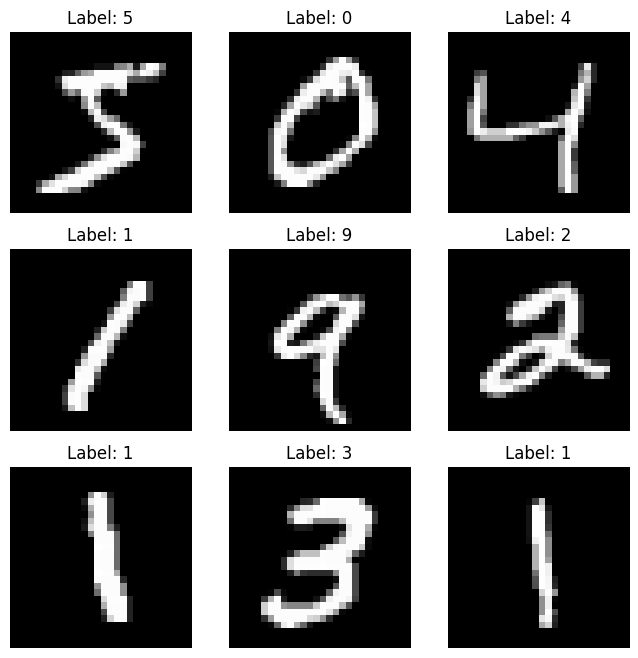

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap="gray")
  plt.title(f"Label: {y_train[i]}")
  plt.axis("off")
plt.show()

In [ ]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10=x_train_c10/255.0
x_test_c10=x_test_c10/255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape}")

CIFAR-10 train shape: (50000, 32, 32, 3)


Day 2




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax")
])
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history =model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8939 - loss: 0.3414 - val_accuracy: 0.9849 - val_loss: 0.0507
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9853 - loss: 0.0460 - val_accuracy: 0.9849 - val_loss: 0.0513
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9895 - loss: 0.0313 - val_accuracy: 0.9856 - val_loss: 0.0463
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9929 - loss: 0.0217 - val_accuracy: 0.9808 - val_loss: 0.0651
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9954 - loss: 0.0138 - val_accuracy: 0.9902 - val_loss: 0.0344


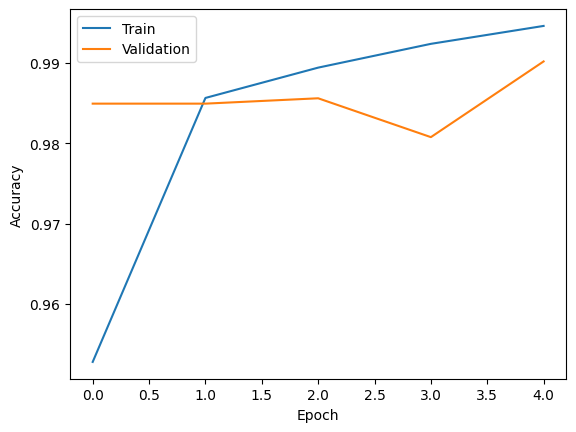

In [ ]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test Accuracy: {test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9874 - loss: 0.0331
Test Accuracy: 0.9911
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from tensorflow.keras.layers import Dropout

model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax")
])
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Day 3

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(10,activation="softmax")
])
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.3173 - loss: 1.8447 - val_accuracy: 0.4830 - val_loss: 1.4911
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5144 - loss: 1.3768 - val_accuracy: 0.5865 - val_loss: 1.2013
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5725 - loss: 1.2199 - val_accuracy: 0.6004 - val_loss: 1.1408
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6011 - loss: 1.1399 - val_accuracy: 0.6459 - val_loss: 1.0102
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6230 - loss: 1.0925 - val_accuracy: 0.6161 - val_loss: 1.0909
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6402 - loss: 1.0487 - val_accuracy: 0.6705 - val_loss: 0.9392
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6538 - loss: 1.0199 - val_accuracy: 0.6963 - val_loss: 0.8954
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.6588 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.70      0.85      0.77      1000
           1       0.85      0.90      0.87      1000
           2       0.61      0.65      0.63      1000
           3       0.58      0.51      0.54      1000
           4       0.67      0.71      0.69      1000
           5       0.75      0.50      0.60      1000
           6       0.73      0.83      0.78      1000
           7       0.75      0.78      0.77      1000
           8       0.87      0.80      0.83      1000
           9       0.85      0.79      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



<function matplotlib.pyplot.show(close=None, block=None)>

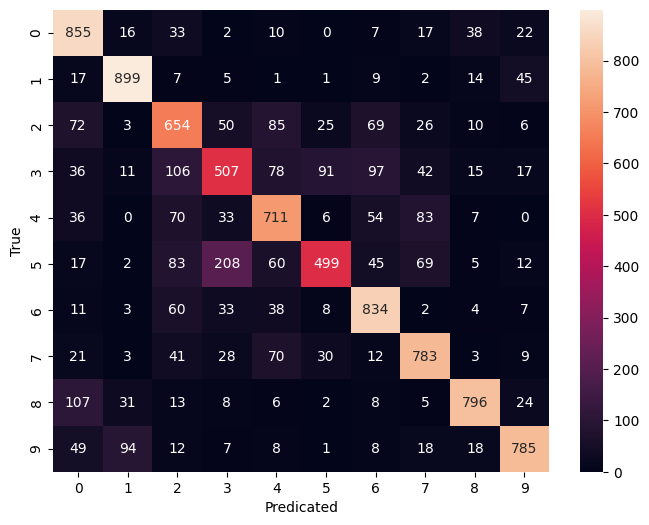

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicated')
plt.ylabel('True')
plt.show

Day 4

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dogs-vs-cats', target_size=(224,224),batch_size=32,class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/dogs-vs-cats', target_size=(224,224),batch_size=32,class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dogs-vs-cats', target_size=(224,224),batch_size=32,class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/dogs-vs-cats', target_size=(224,224),batch_size=32,class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step - accuracy: 0.7768 - loss: 0.5593 - val_accuracy: 0.7985 - val_loss: 0.5109
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.8046 - loss: 0.4892 - val_accuracy: 0.7985 - val_loss: 0.5295
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.7924 - loss: 0.4946 - val_accuracy: 0.7985 - val_loss: 0.5217
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.7903 - loss: 0.4856 - val_accuracy: 0.7985 - val_loss: 0.5310
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8010 - loss: 0.4594 - val_accuracy: 0.7671 - val_loss: 0.5525


In [ ]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 94s 211ms/step - accuracy: 0.8057 - loss: 0.4787 - val_accuracy: 0.7771 - val_loss: 0.5455
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 120ms/step - accuracy: 0.8055 - loss: 0.4445 - val_accuracy: 0.7815 - val_loss: 0.5442
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - accuracy: 0.8101 - loss: 0.4171 - val_accuracy: 0.7805 - val_loss: 0.5455


In [ ]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step


/tmp/ipython-input-2250584478.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


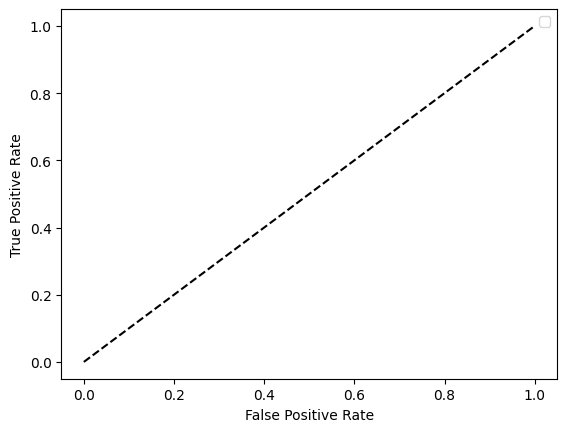

In [ ]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Day 5


make sure khushi also have this day 5 content

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.webp'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")


Saving download.webp to download (1).webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: Dog


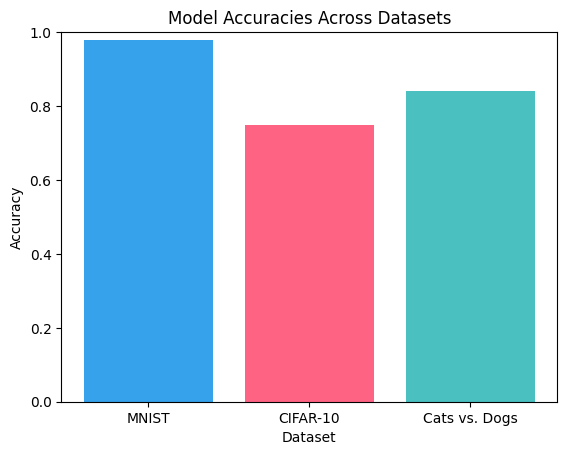

In [ ]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()